# Importing Libraries and Dataframe

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import squarify

In [2]:
# Updating the path to include more of the folder path to make our later code cleaner
path = r"C:\Users\jphar\Instacart Basket Analysis 09-2025"

In [3]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, "02 Data", "Prepared Data", "ords_prods_cust_merge.pkl"))

In [63]:
# Taking a quick look at the dataframe and seeing the field names

ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'hour_ordered_of_day', 'days_since_prior_order', 'first_time_order',
       'product_id', '_merge', 'product_name', 'aisle_id', 'department_id',
       'prices', 'price_category', 'busiest_day', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'avg_order_price', 'spender_type',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependents', 'martial_status', 'income', 'customer_segment',
       'region', 'age_group'],
      dtype='object')

## Data Consistency Check on First Time Customers

In [64]:
# This function is used to create a pivot table based on days_since_prior_order and order_number fields

crosstab = pd.crosstab(ords_prods_cust_merge['days_since_prior_order'], ords_prods_cust_merge['order_number'], dropna = False)

In [65]:
# Next, we'll use the to_clipboard() function to copy this data into Excel and verify our field if whether values not found in days_since_prior_order
# were in fact due to it being the customer's initial order

crosstab.to_clipboard()

In [66]:
# After assessing it Excel our conclusion was accurate

ords_prods_cust_merge['first_time_order'].value_counts()

first_time_order
No     30328763
Yes     2076096
Name: count, dtype: int64

# Project Responses and Calculations

## 2 - Addressing PII Concerns

This was addressed in an earlier notebook but the fields for customer first and last names have been removed since these fields would be classified as PII.
This is also detailed in the Excel report to stakeholders.

## 3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 

Regional Mapping Source: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [9]:
# For this request, there are quite a few regions to condition for so we'll need to first figure out how the values in the state field are reflected.
# This is also handy for double checking results later to ensure it is consistent

ords_prods_cust_merge['state'].value_counts()

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

For Clarity, there are 4 regions and will be reflected as a number for the region field

- Region 1: Northeast (1)
- Region 2: Midwest (2)
- Region 3: South (3)
- Region 4: West (4)

In [67]:
# Now that we've identified the states associated with each region we'll build out a for loop that will classify the state to a particular region
# I've created an empty variable (result) which will hold the values that we can then add to our ords_prods_cust_merge dataframe
# Also, I've initialized variables for region 1, 2, and 4 (and also for readability with the for loop) that contain the states associated 
# with these regions and our else clause will handle region 3

result = []

region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska',
            'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska',
            'Washington', 'Oregon', 'California', 'Hawaii']

for value in ords_prods_cust_merge['state']:
    if value in region_1:
        result.append('1')
    elif value in region_2:
        result.append('2')
    elif value in region_4:
        result.append('4')
    else:
        result.append('3')

In [68]:
# With that done, we can add these fields to our dataframe with the field name as region

ords_prods_cust_merge['region'] = result

In [69]:
# A quick check to see whether our data is accurate and we're good to proceed

ords_prods_cust_merge['region'].value_counts()

region
3    10791885
4     8292913
2     7597325
1     5722736
Name: count, dtype: int64

### 3A - Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [20]:
# Taking a quick look to remember the field names

ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'hour_ordered_of_day', 'days_since_prior_order', 'first_time_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_category',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_order_price', 'spender_type', 'median_days_prior',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependents', 'martial_status', 'income', 'region'],
      dtype='object')

In [32]:
# With the fields identified we can set up a crosstab to compare regions with spending types (i.e., low or high spender)

region_and_spend = pd.crosstab(ords_prods_cust_merge['region'], ords_prods_cust_merge['spender_type'], dropna = False)

In [33]:
# We'll then use Excel to view the findings. The table out will be reflected in the Excel report to stakeholders

region_and_spend.to_clipboard()

#### Analysis

Our highlight table is reflected in the Excel report. As we can see from the table, Region 3 (South) has the highest number of highest and lowest spenders compared to the other regions. These are individuals that are spending on average either more or less than $10 per order. Region 1 however, has the lowest amount of high and low spenders with their region. 

## 4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# So to create this field, I will leverage our max_order field as it reflects the highest number of orders 
# that the customer has made for every record in the dataframe. We'll then compare that value to either less than 5 or greater than or equal to 5
# to define our new field

ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] < 5, 'activity_level'] = 'Low activity customer'
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] >= 5, 'activity_level'] = 'Regular activity customer'

In [24]:
# To determine if this worked successfully, we'll create a subset that we can then calculate the number of records that fit the criteria 
# for 'low activity customer' and see if that matches to the overall dataframe

df_low_activity = ords_prods_cust_merge[ords_prods_cust_merge['max_order'] < 5]

In [25]:
df_low_activity['max_order'].value_counts()

max_order
4    753543
3    686741
2         6
1         5
Name: count, dtype: int64

In [26]:
# And with a quick calculation we can see that this value matches what we have for the 'low activity customer'

ords_prods_cust_merge['activity_level'].value_counts()

activity_level
Regular activity customer    30964564
Low activity customer         1440295
Name: count, dtype: int64

In [101]:
# Now we'll exclude these individuals by creating a subset for regular active users

df_reg_activity = ords_prods_cust_merge[ords_prods_cust_merge['max_order'] > 5]

In [72]:
df_reg_activity['max_order'].value_counts()

max_order
99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
93      50333
90      48328
97      44949
98      44587
96      40453
Name: count, Length: 94, dtype: int64

In [73]:
# With that, we'll export this data since it is needed by a stakeholder. To have this work effectively, we'll need to export as a pickle
# since the number of low activity customer exceeds the number of rows that can be maintained by Excel

df_reg_activity.to_pickle(os.path.join(path, "02 Data", "Prepared Data", "activity_data.pkl"))

## 5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

Below are conditions to create a customer_segment field based on age, income, certain goods in the department_id field, and number of dependents.

- Number of Dependents > 0 (Parents)
- Age Range - 18 to 34 (Young), 35-64 (Middle Age), 65+ (Senior Age)
- Income - Under `$100,000` (Low-Income), Above `$100,000` (High-Income)
- Certain Goods Purchased in department_id - 11 (Personal Care), 17 (Household), and 18 (Babies)  

In [74]:
# Importing the data dictionary for convenience in understanding the department_id values

data_dict = pd.read_csv(os.path.join(path, "02 Data", "Prepared Data", "departments_wrangled.csv"))

In [5]:
data_dict

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [75]:
# With our conditions identified, we'll need to create a user-defined function (customer profile) as this type of classification function isn't native 
# to Python. We will use age as the primary condition to then test the remaining conditions, which will return some classification of the customer
# if the order fits the criteria

def customer_profile(row):
    if row['age'] < 35:
        if row['num_of_dependents'] > 0:
            if row['income'] < 100000:
                if row['department_id'] in [11, 17, 18]:
                    return 'Young, Low-income Parent'
                else:
                    return 'Young Adult, No Kids'
            else:
                if row['department_id'] in [11, 17, 18]:
                    return 'Young, High-income Parent'
                else:
                    return 'Young Adult, No Kids'
        else:
            return 'Young Adult, No Kids'
    elif row['age'] < 65:
        if row['num_of_dependents'] > 0:
            if row['income'] < 100000:
                if row['department_id'] in [11, 17, 18]:
                    return 'Middle Age, Low-income Parent'
                else:
                    return 'Middle Age Adult, No Kids'
            else:
                if row['department_id'] in [11, 17, 18]:
                    return 'Middle Age, High-income Parent'
                else:
                    return 'Middle Age Adult, No Kids'
        else:
            return 'Middle Age Adult, No Kids'
    else:
        if row['income'] < 100000:
            return 'Senior Age, Low-income Adult'
        else:
            return 'Senior Age, High-income Adult'

In [76]:
# With our customer_profile function defined, we can apply it to our dataframe under the customer_segment field name

ords_prods_cust_merge['customer_segment'] = ords_prods_cust_merge.apply(customer_profile, axis=1)

In [77]:
# Taking a quick look at our results for this new field

ords_prods_cust_merge['customer_segment'].value_counts()

customer_segment
Middle Age Adult, No Kids         14627304
Young Adult, No Kids               8311325
Senior Age, High-income Adult      5987901
Senior Age, Low-income Adult       2587183
Middle Age, High-income Parent      323882
Young, Low-income Parent            304781
Middle Age, Low-income Parent       250934
Young, High-income Parent            11549
Name: count, dtype: int64

## 6 - Create an appropriate visualization to show the distribution of profiles.

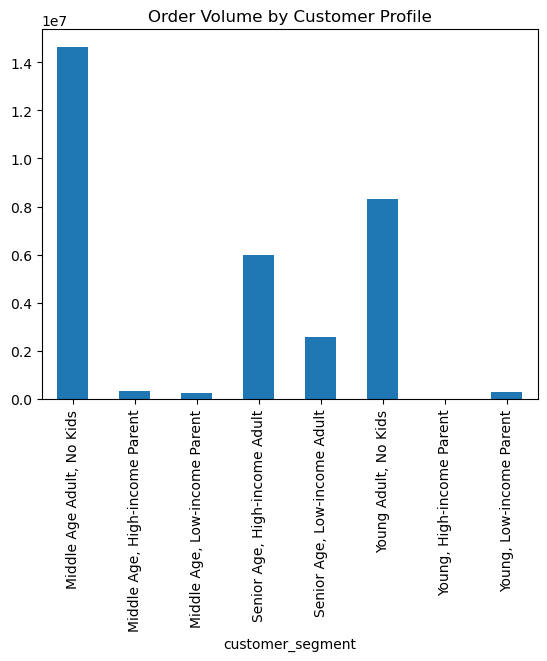

In [78]:
# We're dealing with quite a few groups but a bar chart would suffice to see how these groups compare

customer_bar = ords_prods_cust_merge['customer_segment'].value_counts().sort_index().plot.bar(title = "Order Volume by Customer Profile")

In [8]:
# Exporting

customer_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_seg_bar.png'))

## 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [79]:
# We'll leverage the groupby() and agg() functions to calculate the mean, min, max values for prices and order_number respectively

ords_prods_cust_merge.groupby('customer_segment').agg({'prices':['mean', 'min', 'max']})

prices           
                                    mean  min   max
customer_segment                                   
Middle Age Adult, No Kids       7.797130  1.0  25.0
Middle Age, High-income Parent  7.716248  1.0  15.0
Middle Age, Low-income Parent   7.521730  1.0  15.0
Senior Age, High-income Adult   7.960873  1.0  25.0
Senior Age, Low-income Adult    7.416295  1.0  25.0
Young Adult, No Kids            7.792491  1.0  25.0
Young, High-income Parent       7.736886  1.0  15.0
Young, Low-income Parent        7.602742  1.0  15.0

In [25]:
ords_prods_cust_merge.groupby('customer_segment').agg({'order_number':['mean', 'min', 'max']})

order_number        
                                       mean min max
customer_segment                                   
Middle Age Adult, No Kids         17.193338   1  99
Middle Age, High-income Parent    17.046517   1  99
Middle Age, Low-income Parent     16.520209   1  99
Senior Age, High-income Adult     17.190600   1  99
Senior Age, Low-income Adult      16.884490   1  99
Young Adult, No Kids              17.138166   1  99
Young, High-income Parent         17.610789   1  99
Young, Low-income Parent          16.641822   1  99

## 8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### By Region

In [80]:
# We'll calculate the frequency for each customer segment by region and then visualize it as a treemap to get a clearer picture which group of customers
# contribute the most order volume

ords_prods_cust_merge[['region','customer_segment']].value_counts()

region  customer_segment              
3       Middle Age Adult, No Kids         4866395
4       Middle Age Adult, No Kids         3762187
2       Middle Age Adult, No Kids         3468370
3       Young Adult, No Kids              2792838
1       Middle Age Adult, No Kids         2530352
4       Young Adult, No Kids              2112036
3       Senior Age, High-income Adult     1976493
2       Young Adult, No Kids              1926766
4       Senior Age, High-income Adult     1526312
1       Young Adult, No Kids              1479685
2       Senior Age, High-income Adult     1394864
1       Senior Age, High-income Adult     1090232
3       Senior Age, Low-income Adult       859764
4       Senior Age, Low-income Adult       667768
2       Senior Age, Low-income Adult       595980
1       Senior Age, Low-income Adult       463671
3       Middle Age, High-income Parent     105901
        Young, Low-income Parent           101166
        Middle Age, Low-income Parent       85007
4       Mid

In [81]:
# Using clipboard function here to check for data consistency in Excel and the values obtained are consistent
# I also applied some transformations in the values to streamline the process for building the treemap visualization

ords_prods_cust_merge[['region','customer_segment']].value_counts().to_clipboard()

I set a limit of above 400,000 orders to ensure readability since there are many groups.

Region Key
- Region 1: Purple
- Region 2: Green
- Region 3: Blue
- Region 4: Orange

Label Key
- MA Zero: Middle Age Adult, No Kids
- SA HI: Senior Age, High-Income Adult
- YA Zero: Young Age Adult, No Kids
- SA LI: Senior Age, Low-Income Adult

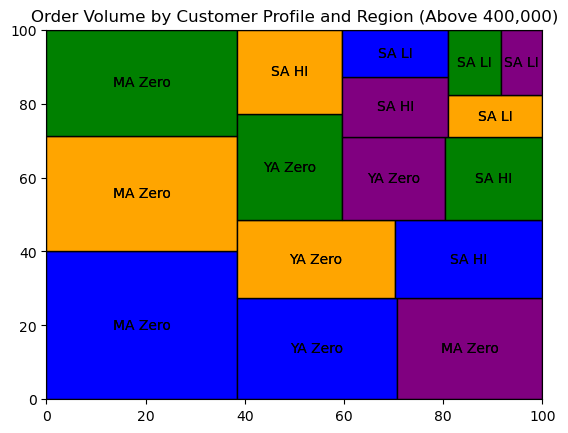

In [10]:
data = [4866395, 3762187, 3468370, 2792838, 2530352, 2112036, 1976493, 1926766, 1526312, 1479685, 1394864, 1090232, 859764, 667768, 595980, 463671]

colors = ['Blue', 'Orange', 'Green', 'Blue', 'Purple', 'Orange', 'Blue', 'Green', 'Orange', 
          'Purple', 'Green', 'Purple', 'Blue', 'Orange', 'Green', 'Purple']
labels = ['MA Zero', 'MA Zero', 'MA Zero', 'YA Zero', 'MA Zero', 'YA Zero', 'SA HI', 'YA Zero', 'SA HI', 
          'YA Zero', 'SA HI', 'SA HI', 'SA LI', 'SA LI', 'SA LI', 'SA LI']

squarify.plot(sizes=data, color = colors, label = labels, ec = 'black')
plt.title('Order Volume by Customer Profile and Region (Above 400,000)')

treemap_region = squarify.plot(sizes=data, color = colors, label = labels, ec = 'black')

In [11]:
# Exporting

treemap_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'treemap_region.png'))

### By Department

In [83]:
# To assess by department, I'll use value_counts() to obtain the count based on department_id and customer_segment

ords_prods_cust_merge[['department_id','customer_segment']].value_counts()

department_id  customer_segment             
4              Middle Age Adult, No Kids        4445296
16             Middle Age Adult, No Kids        2527230
4              Young Adult, No Kids             2520232
               Senior Age, High-income Adult    1790540
16             Young Adult, No Kids             1445304
                                                 ...   
21             Senior Age, Low-income Adult        5467
10             Senior Age, Low-income Adult        3122
11             Young, High-income Parent           3026
2              Senior Age, Low-income Adult        2813
18             Young, High-income Parent           2310
Name: count, Length: 96, dtype: int64

In [82]:
# Same as with the region section above - using clipboard function here to check for data consistency and applied transformations
# in the values to streamline the process for building the treemap visualization

ords_prods_cust_merge[['department_id','customer_segment']].value_counts().to_clipboard()

In [85]:
# Viewing the department codes again for convenience

data_dict

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


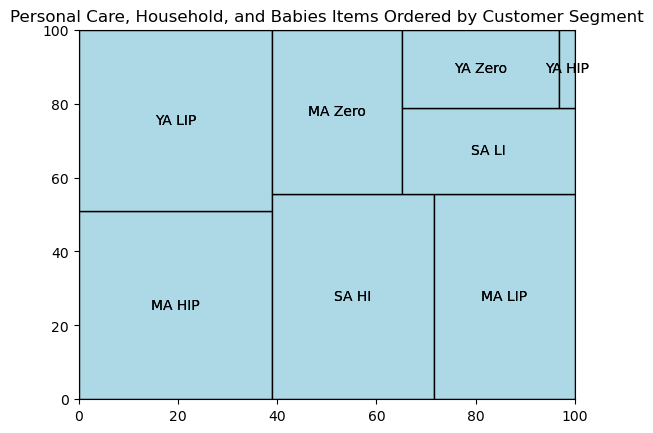

In [84]:
# I thought it would be best to show the departments that we used as indicators for parents to get a better idea of how these
# groups order volume compares to the other primary groups

data = [88872, 85296, 81183, 70805, 52245, 36222, 29923, 3026]

labels = ['MA HIP', 'YA LIP', 'SA HI', 'MA LIP', 'MA Zero', 'SA LI', 'YA Zero', 'YA HIP']

squarify.plot(sizes=data, label = labels, color = '#add8e6', ec = 'black')
plt.title('Personal Care, Household, and Babies Items Ordered by Customer Segment')

treemap_dept = squarify.plot(sizes=data, label = labels, color = '#add8e6', ec = 'black')

In [13]:
# Exporting

treemap_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'treemap_dept.png'))

# Project Brief Key Questions

## 1 - What are the busiest days of the week and the busiest hours of the week in order to schedule ads at times where there are fewer orders?

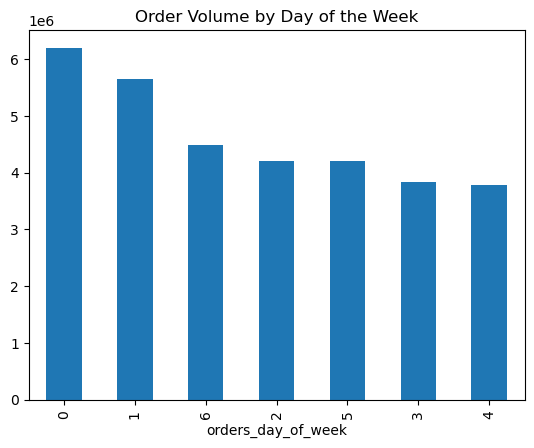

In [102]:
# Visualizing this via a bar chart to compare order volume for each day

ords_prods_cust_merge['orders_day_of_week'].value_counts().plot.bar(title = 'Order Volume by Day of the Week')

bar_order_dow = ords_prods_cust_merge['orders_day_of_week'].value_counts().plot.bar(title = 'Order Volume by Day of the Week')

In [15]:
# Exporting

bar_order_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_dow.png'))

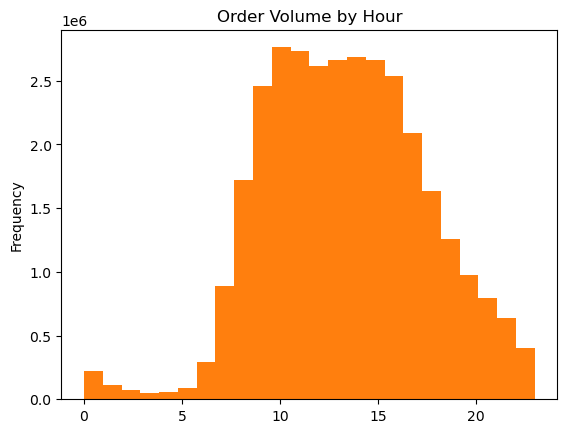

In [87]:
# Visualizing the frequency via histogram since we're dealing with continuous data (i.e., count and time)

ords_prods_cust_merge['hour_ordered_of_day'].plot.hist(bins = 24, title = 'Order Volume by Hour')

hist_hour = ords_prods_cust_merge['hour_ordered_of_day'].plot.hist(bins = 24, title = 'Order Volume by Hour')

In [19]:
# Exporting

hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour.png'))

## 2 - What times of the day are when people spend the most money?

In [103]:
# To set this up we'll first need to create a list that will store the randomized Boolean values to parse the data.
# I'm opting for a 70/30 split

np.random.seed(10)
split = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [22]:
# Now we'll make subsets of ords_prods_cust_merge based off of the randomization we built with the split variable

big = ords_prods_cust_merge[split]

small = ords_prods_cust_merge[~split]

In [23]:
# Creating an additional subset that will only take the two fields of interest: prices and hour_ordered_of_day

df_line = small[['prices', 'hour_ordered_of_day']]

Text(0.5, 1.0, 'Average Prices by Hour of the Day')

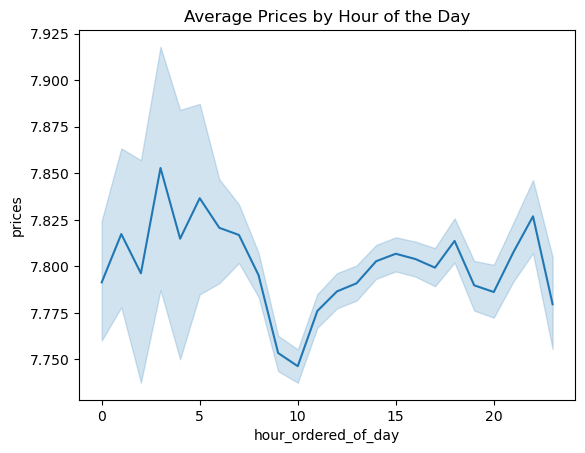

In [24]:
line_by_hour = sns.lineplot(data = df_line, x = 'hour_ordered_of_day', y = 'prices')

plt.title('Average Prices by Hour of the Day')

In [25]:
# Exporting

line_by_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_per_hr.png'))

## 3 - Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [88]:
# We created a pricing category field earlier and so now we'll visualize this field to get 
# a better sense of the kinds of products Instacart offers as a bar chart.

ords_prods_cust_merge['price_category'].value_counts()

price_category
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

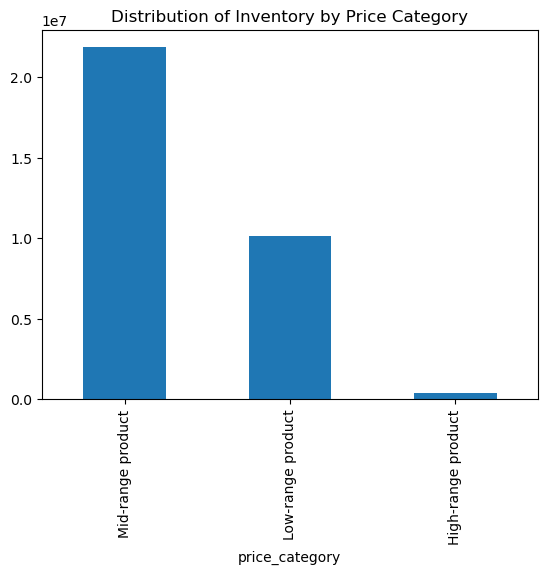

In [34]:
ords_prods_cust_merge['price_category'].value_counts().plot.bar(title = "Distribution of Inventory by Price Category")

bar_price_category = ords_prods_cust_merge['price_category'].value_counts().plot.bar(title = "Distribution of Inventory by Price Category")

In [35]:
# Exporting

bar_price_category.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_category.png'))

In [89]:
# Thought it may also be helpful to provide a histogram of prices to see where the pricing and the count of items in that pricing bucket lies

table = ords_prods_cust_merge['prices'].value_counts(bins = 25, sort = False)

In [13]:
table.to_clipboard()

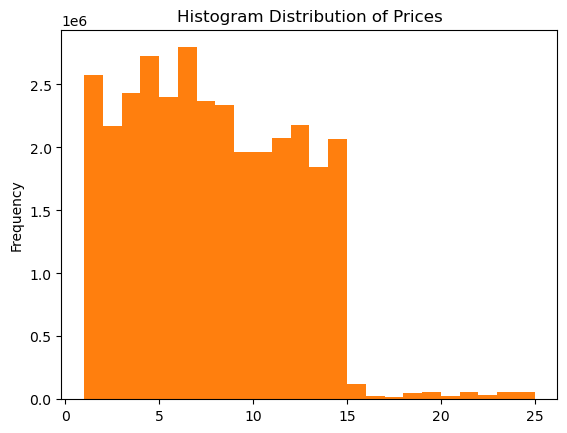

In [29]:
ords_prods_cust_merge['prices'].plot.hist(bins = 24, title = 'Histogram Distribution of Prices')

hist_price = ords_prods_cust_merge['prices'].plot.hist(bins = 24, title = 'Histogram Distribution of Prices')

In [30]:
# Exporting

hist_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_price.png'))

## 4 - Are there certain types of products that are more popular than others? Which departments have the highest frequency of product orders?

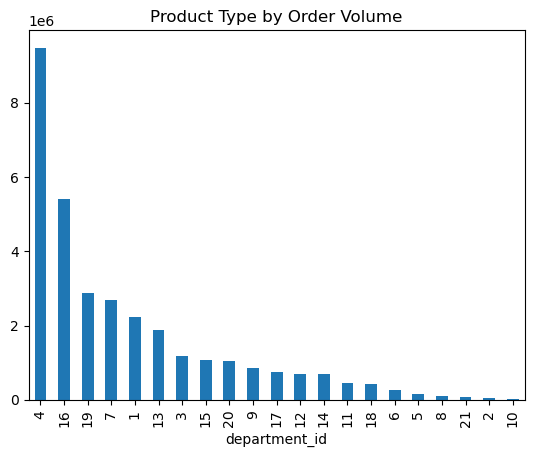

In [92]:
# Using a bar chart to address the question

ords_prods_cust_merge['department_id'].value_counts().plot.bar(title = 'Product Type by Order Volume')

bar_dept = ords_prods_cust_merge['department_id'].value_counts().plot.bar(title = 'Product Type by Order Volume')

In [91]:
# Viewing the department codes again for convenience

data_dict

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [33]:
# Exporting

bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept.png'))

## 5 - Marketing and Sales teams are interested in different types of customers and how their ordering behaviors differ.

### 5.1 - What's the distribution among users in regards to their brand loyalty (i.e., How often do they return to Instacart)?

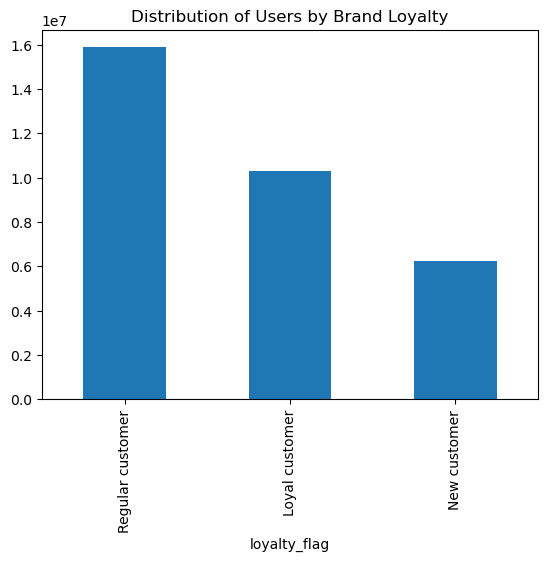

In [93]:
# We've already made a loyalty_flag variable to flag users to one of three categories: new, regular, or loyal customer so this would be perfect to 
# show as a bar chart

ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(title = 'Distribution of Users by Brand Loyalty')

bar_loyalty = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(title = 'Distribution of Users by Brand Loyalty')

In [37]:
# Exporting

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

### 5.2 - Are there differences in ordering habits based on a customer's loyalty status?

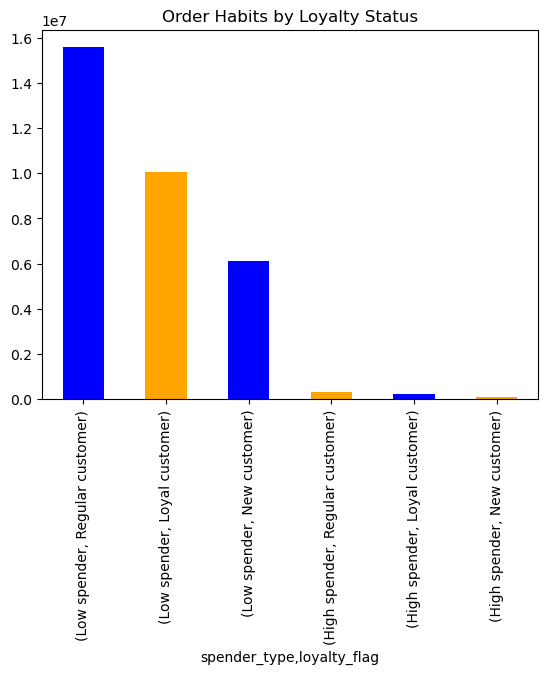

In [104]:
# This is a bit more complex question but I've calculated the count based on the spender_type 
# and loyalty_flag and the visualized these groups as bar chart

ords_prods_cust_merge[['spender_type', 'loyalty_flag']].value_counts().plot.bar(title = 'Order Habits by Loyalty Status', color = ['Blue', 'Orange'])

order_by_loyalty_and_spend = ords_prods_cust_merge[['spender_type', 'loyalty_flag']].value_counts().plot.bar(title = 'Order Habits by Loyalty Status', color = ['Blue', 'Orange'])

In [39]:
# Exporting

order_by_loyalty_and_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyal_and_spend.png'))

### 5.3 - Are there differences in ordering habits based on a customer's region?

In [95]:
# Using the value_counts() function of the region field to then visualize as a bar chart. For readability, I've applied some colors to each of the bars

ords_prods_cust_merge['region'].value_counts()

region
3    10791885
4     8292913
2     7597325
1     5722736
Name: count, dtype: int64

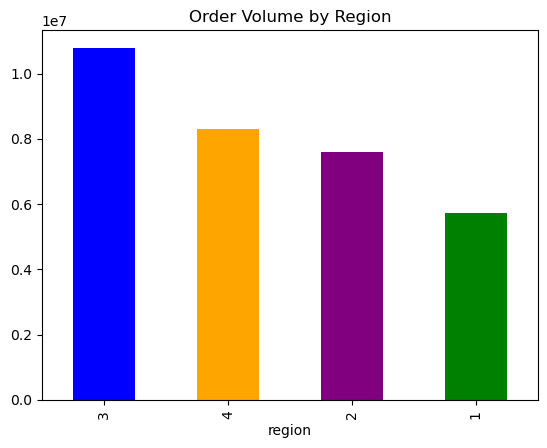

In [43]:
ords_prods_cust_merge['region'].value_counts().plot.bar(title = 'Order Volume by Region', color = ['Blue', 'Orange', 'Purple', 'Green'])

bar_region = ords_prods_cust_merge['region'].value_counts().plot.bar(title = 'Order Volume by Region', color = ['Blue', 'Orange', 'Purple', 'Green'])

In [44]:
# Exporting

bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region.png'))

### 5.4 - Is there a connection between age and family status in terms of ordering habits?

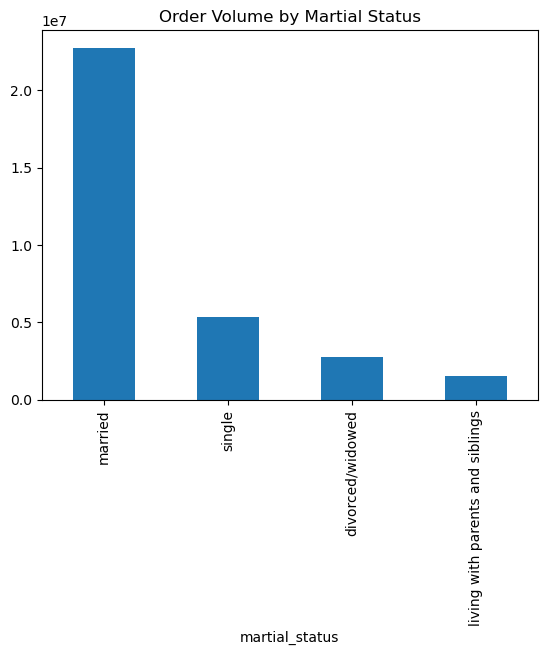

In [96]:
# We'll take a look at the count of the martial status to visualize as a bar chart to compare the groups

ords_prods_cust_merge['martial_status'].value_counts().plot.bar(title = 'Order Volume by Martial Status')

bar_marital = ords_prods_cust_merge['martial_status'].value_counts().plot.bar(title = 'Order Volume by Martial Status')

In [46]:
# Exporting

bar_marital.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_martial.png'))

In [97]:
# For ages, we need to set up categories to visualize the groups well. Following the same age conditions that were used 
# earlier in the treemap visualizations we used anyone under the age of 35 to be a young adult, between 35 and 65 to be middle age, 
# and anyone else to be senior age and then add these results into a new field called age_group to then visualize as a bar chart

result = []

for age in ords_prods_cust_merge['age']:
    if age < 35:
        result.append('Young Age Adult')
    elif age < 65:
        result.append('Middle Age Adult')
    else:
        result.append('Senior Age Adult')

In [50]:
ords_prods_cust_merge['age_group'] = result

In [34]:
ords_prods_cust_merge['age_group'].value_counts()

age_group
Middle Age Adult    15202120
Young Age Adult      8627655
Senior Age Adult     8575084
Name: count, dtype: int64

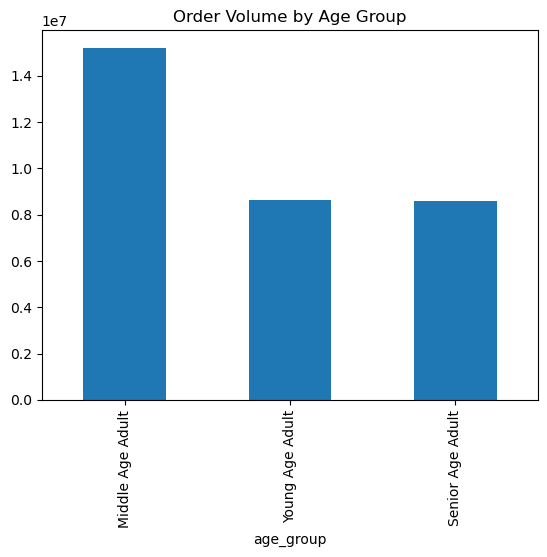

In [51]:
ords_prods_cust_merge['age_group'].value_counts().plot.bar(title = 'Order Volume by Age Group')

bar_age_group = ords_prods_cust_merge['age_group'].value_counts().plot.bar(title = 'Order Volume by Age Group')

In [52]:
# Exporting

bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))

### 5.5 - What different classifications does the demographic information suggest? Age? Income? Certain types of Goods? Family Status?

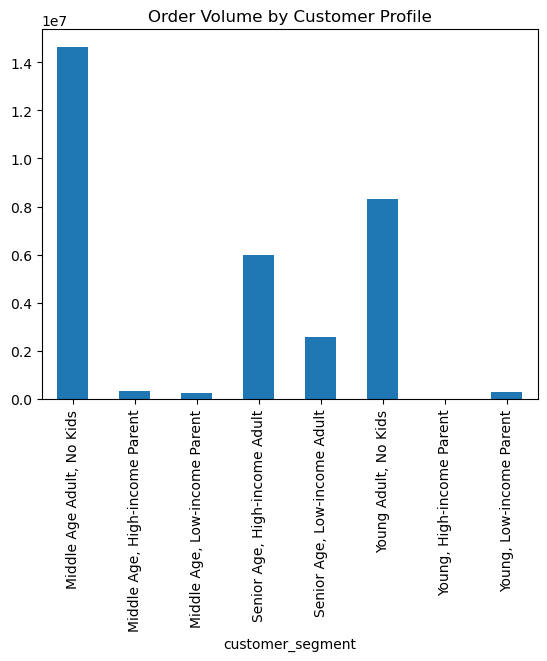

In [98]:
# From our customer_segment field created earlier, we can visualize it here to get an idea of order volume by segment

ords_prods_cust_merge['customer_segment'].value_counts().sort_index().plot.bar(title = 'Order Volume by Customer Profile')

bar_segment = ords_prods_cust_merge['customer_segment'].value_counts().sort_index().plot.bar(title = 'Order Volume by Customer Profile')

In [54]:
# Exporting

bar_segment.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_segment.png'))

## 5.6 - What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

For this section, I've used some of the visualizations created earlier along with a few new ones to address this question. The visualizations here are composed of treemaps and help us to see how groups prioritize which Instacart products.

Text(0.5, 1.0, 'Order Volume by Customer Profile and Region (Above 400,000)')

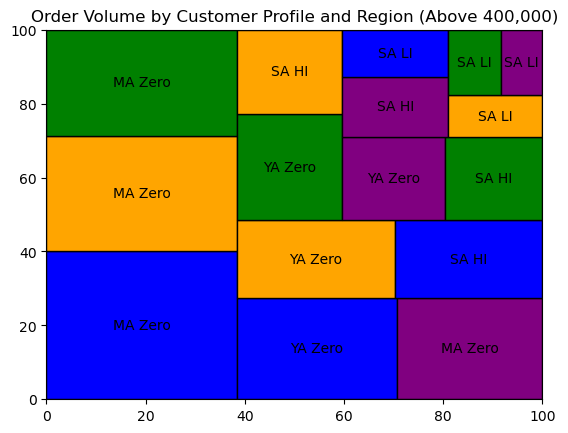

In [99]:
# Using the treemap created from earlier

data = [4866395, 3762187, 3468370, 2792838, 2530352, 2112036, 1976493, 1926766, 1526312, 1479685, 1394864, 1090232, 859764, 667768, 595980, 463671]

colors = ['Blue', 'Orange', 'Green', 'Blue', 'Purple', 'Orange', 'Blue', 'Green', 'Orange', 
          'Purple', 'Green', 'Purple', 'Blue', 'Orange', 'Green', 'Purple']
labels = ['MA Zero', 'MA Zero', 'MA Zero', 'YA Zero', 'MA Zero', 'YA Zero', 'SA HI', 'YA Zero', 'SA HI', 
          'YA Zero', 'SA HI', 'SA HI', 'SA LI', 'SA LI', 'SA LI', 'SA LI']

squarify.plot(sizes=data, color = colors, label = labels, ec = 'black')
plt.title('Order Volume by Customer Profile and Region (Above 400,000)')

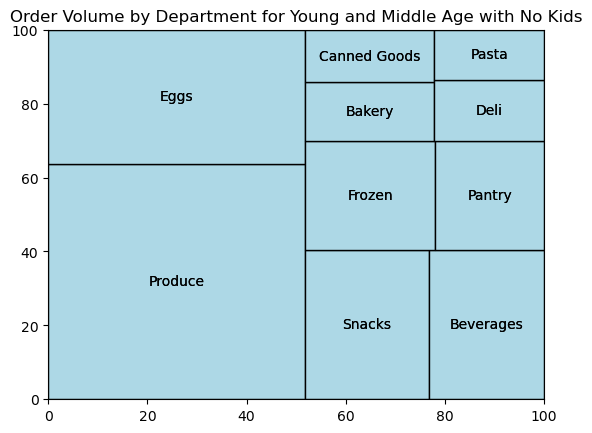

In [55]:
data = [4445296, 2527230, 1354531, 1265190, 1049262, 879157, 550154, 499729, 494610, 405829]
labels = [ 'Produce', 'Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry', 'Bakery', 'Canned Goods', 'Deli', 'Pasta']

squarify.plot(sizes=data, color = '#add8e6', label = labels, ec = 'black')
plt.title('Order Volume by Department for Young and Middle Age with No Kids')

tree_item_mid_and_young = squarify.plot(sizes=data, color = '#add8e6', label = labels, ec = 'black')

In [56]:
#Exporting

tree_item_mid_and_young.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'treemap_item_mid_and_young.png'))

Text(0.5, 1.0, 'Personal Care, HouseHold, and Babies Order Volume by Customer Segment')

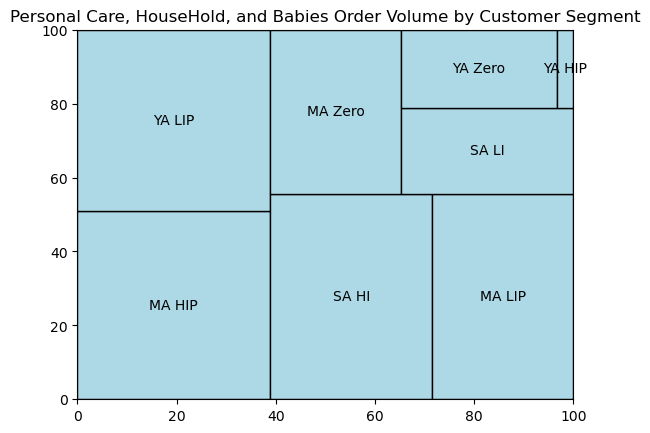

In [100]:
# Using the treemap created from earlier

data = [88872, 85296, 81183, 70805, 52245, 36222, 29923, 3026]

labels = ['MA HIP', 'YA LIP', 'SA HI', 'MA LIP', 'MA Zero', 'SA LI', 'YA Zero', 'YA HIP']

squarify.plot(sizes=data, label = labels, color = '#add8e6', ec = 'black')
plt.title('Personal Care, HouseHold, and Babies Order Volume by Customer Segment')

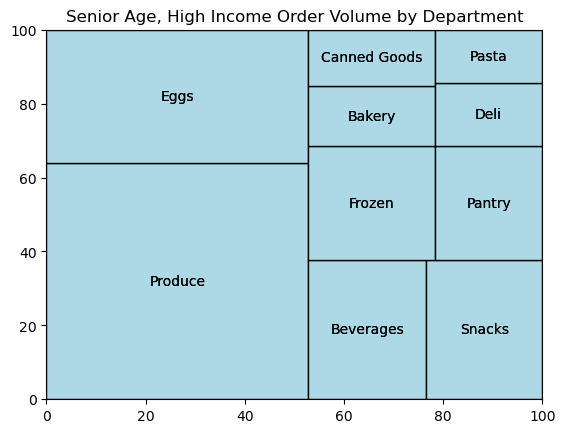

In [59]:
data = [1790540, 1011292, 473202, 466754, 418347, 354865, 220237, 205606, 195784, 166672]

labels = ['Produce', 'Eggs', 'Beverages', 'Snacks', 'Frozen', 'Pantry', 'Bakery', 'Canned Goods', 'Deli', 'Pasta']

squarify.plot(sizes=data, label = labels, color = '#add8e6', ec = 'black')
plt.title('Senior Age, High Income Order Volume by Department')

treemap_senior_hi = squarify.plot(sizes=data, label = labels, color = '#add8e6', ec = 'black')

In [60]:
#Exporting

treemap_senior.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'treemap_senior_hi.png'))

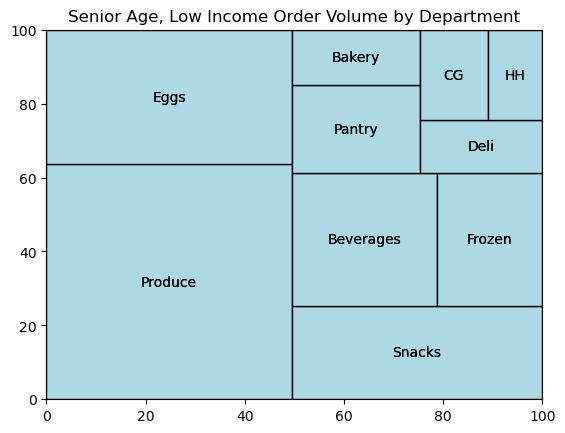

In [61]:
data = [723223, 414921, 293761, 241630, 175322, 142114, 89285, 81834, 76832, 62293]
labels = ['Produce', 'Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry', 'Bakery', 'Deli', 'CG', 'HH']

squarify.plot(sizes=data, label = labels, color = '#add8e6', ec = 'black')
plt.title('Senior Age, Low Income Order Volume by Department')

treemap_senior_li = squarify.plot(sizes=data, label = labels, color = '#add8e6', ec = 'black')

In [62]:
#Exporting

treemap_senior_li.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'treemap_senior_li.png'))